# Example #2: Exploring Data Science with Python - Analyzing Sea Level Trends

In this exercise, we will be importing, analyzing, and plotting [NOAA Tide Gauge data](https://tidesandcurrents.noaa.gov/stations.html?type=Water+Levels) to interpret and visualize sea level trends for two sites in MA. We will be learning and utilizing these skills:

- Importing CSVs and converting them to a usable format with *pandas*
- Plotting data with *matplotlib*
- Creating functions

*Optional:*
- Fitting a regression model to imported data with *sklearn*

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

### 1. Import & Clean Data
Let's begin with bringing our tide gauge data into python. I've included two CSV files for sea level data - please click on one of these files to examine the input format. For this first part, we'll be using the Woods Hole data, and working with the `pandas` library. It is best to use `pandas` when working with tabular data, but you can also read & work with files using `numpy`.

In [2]:
# use the pandas read_csv function to bring in the data, and assign it to a variable
wh_sl = pd.read_csv('Woods_Hole_MA_2023.csv')

# print the data type - what does read_csv assign this new variable?
print(type(wh_sl))

<class 'pandas.core.frame.DataFrame'>


To make sure the data was imported correctly, we can examine the first few rows using the `head()` function on the dataframe.

In [3]:
# name_of_dataframe.head()
wh_sl.head()

,Year,Month,Monthly_MSL,Linear_Trend,High_Conf.,Low_Conf.
0,1932,8,-0.180,-0.165,-0.156,-0.173
1,1932,9,-0.143,-0.164,-0.156,-0.173
2,1932,10,-0.220,-0.164,-0.155,-0.173
3,1932,11,-0.141,-0.164,-0.155,-0.172
4,1932,12,-0.160,-0.164,-0.155,-0.172


We can also examine the last few rows using the `tail()` function.

In [4]:
# name_of_dataframe.tail()
wh_sl.tail()

,Year,Month,Monthly_MSL,Linear_Trend,High_Conf.,Low_Conf.
1040,2022,12,0.193,0.107,0.115,0.098
1041,2023,1,0.214,0.107,0.116,0.098
1042,2023,2,0.167,0.107,0.116,0.099
1043,2023,3,0.270,0.108,0.116,0.099
1044,2023,4,0.193,0.108,0.116,0.099


The `info()` function provides a description of the rows, columns, and datatypes in our dataframe:

In [5]:
# name_of_dataframe.info()
wh_sl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           1045 non-null   int64  
 1    Month         1045 non-null   int64  
 2    Monthly_MSL   1045 non-null   float64
 3    Linear_Trend  1045 non-null   float64
 4    High_Conf.    1045 non-null   float64
 5    Low_Conf.     1045 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 49.1 KB


The first row of text tells us what the datatype of our input variable is (in this case, a dataframe which we identified above). Following that, we can see the number of rows for all columns, as well as the number of columns in the dataframe. What's neat about this function as well is you can see the specific datatype of values for each respective column. For example, the values in `Year` are all integers, and the specific mean sea level measurement values (`Monthly_MSL`) are floats.

The `describe()` function provides statistical information on each column of the dataframe:

In [6]:
# name_of_dataframe.describe()
wh_sl.describe()

,Year,Month,Monthly_MSL,Linear_Trend,High_Conf.,Low_Conf.
count,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000
mean,1977.733014,6.506220,-0.027438,-0.027504,-0.021432,-0.033602
std,26.615333,3.461226,0.093001,0.079943,0.079906,0.080003
min,1932.000000,1.000000,-0.308000,-0.165000,-0.156000,-0.173000
25%,1954.000000,3.000000,-0.100000,-0.099000,-0.093000,-0.105000
50%,1979.000000,7.000000,-0.036000,-0.024000,-0.019000,-0.028000
75%,2001.000000,10.000000,0.038000,0.041000,0.047000,0.036000
max,2023.000000,12.000000,0.276000,0.108000,0.116000,0.099000


Congratulations, you've successfully imported data into Python! Pandas mostly supports .csv and Excel files, but with other libraries it's very easy to import .txt, .netcdf, and other data file types quite easily. Numpy has great support for reading .txt files into arrays!

While we got quite lucky in our water levels being read in quite nicely with no errors, that will often not be the case working with data for research. Luckily, Pandas, like others Python toolboxes, has a series of functions that allow us to manipulate and clean up dataframes. I encourage you to read the full documentation for Pandas and other libraries to find those functions. And remember that everytime you change something from the original dataset to copy and rename it as a new variable!

Even though our data looks fine, we'll take a look at how some of these functions can alter dataframes:

In [7]:
# first, copy the data frame so we don't mess with the original data!
wh_sl2 = wh_sl.copy()

# we can also get the column names from the dataframe
colNames = wh_sl2.columns
print(colNames)

# reassign the index of the dataframe to years in the dataset using the .set_index() function
wh_sl2 = wh_sl2.set_index(['Year'])
wh_sl2.head()

Index(['Year', ' Month', ' Monthly_MSL', ' Linear_Trend', ' High_Conf.',
       ' Low_Conf.'],
      dtype='object')


,Month,Monthly_MSL,Linear_Trend,High_Conf.,Low_Conf.
Year,,,,,
1932,8,-0.180,-0.165,-0.156,-0.173
1932,9,-0.143,-0.164,-0.156,-0.173
1932,10,-0.220,-0.164,-0.155,-0.173
1932,11,-0.141,-0.164,-0.155,-0.172
1932,12,-0.160,-0.164,-0.155,-0.172


In [8]:
# index the 2nd and 3rd columns to a new dataset (remember, indexing starts at 0!)
wh_sl3 = wh_sl2[wh_sl2.columns[1:3]]
wh_sl3.head()

,Monthly_MSL,Linear_Trend
Year,,
1932,-0.180,-0.165
1932,-0.143,-0.164
1932,-0.220,-0.164
1932,-0.141,-0.164
1932,-0.160,-0.164


While a little silly to mess with perfectly good data, hopefully these functions highlight some of the capabilities pandas has to manipulate dataframes. You never know when they may come in handy!

Now we're ready to move on to the next step and visualize our water level trends.

### 2. Plot Sea Level Data

We are ready to plot our newly cleaned up sea level data. We'll be using the `matplotlib` library to visual monthly mean sea level through time for Woods Hole.

First, let's assign some variables to values from the dataframe to save us some typing:

In [9]:
# index the Years and Monthly_MSL columns from the dataframe into separate variables

# use loc to index data by name/string
years = wh_sl.loc[:,'Year']
# use iloc to index data by position
msl = wh_sl.iloc[:,2]

print(years)
print(msl)

0       1932
1       1932
2       1932
3       1932
4       1932
        ... 
1040    2022
1041    2023
1042    2023
1043    2023
1044    2023
Name: Year, Length: 1045, dtype: int64
0      -0.180
1      -0.143
2      -0.220
3      -0.141
4      -0.160
        ...  
1040    0.193
1041    0.214
1042    0.167
1043    0.270
1044    0.193
Name:  Monthly_MSL, Length: 1045, dtype: float64


Below are commands to plot MSL as a solid black line. We also assign labels to the x and y axis, as well as give the plot a title.

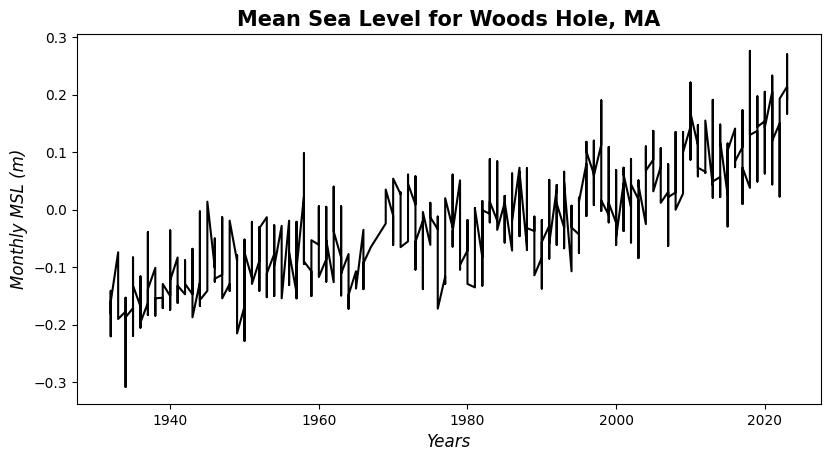

In [10]:
# create a figure
fig = plt.figure(figsize=plt.figaspect(0.5))
# create a line graph
plt.plot(years,msl, color='k');
# add X & Y axis labels
plt.xlabel('Years',style='italic',fontsize=12);
plt.ylabel('Monthly MSL (m)',style='italic',fontsize=12);
# add a title
plt.title('Mean Sea Level for Woods Hole, MA', weight='bold',fontsize=15);
# show plot
plt.show()

Looks awesome! We have so far imported data, processed it into a usable format, and have not visualized our plot with a line graph. Great work!

There are other functions within the `matplotlib` library to further customize plots that you create. You can find those & their descriptions in the library documentation (linked in **Relevant Libraries** from main notebook) or with the cheat sheet (linked in **Resources** from main notebook).

### 3. Constructing Functions

We now have an established workflow to extract, process, and plot sea level data. Wouldn't it be nice if we could use this with other sea level rise data sets? This is where functions come in to help!

A function takes generic input variables, performs a series of operations on them (including calculations, data processing, plotting, etc.), and returns a specified variable, figure, or even dataset! These can be written within a script, or as a separate python file. Functions are helpful because:
1. You don't have to rewrite the same block of code over & over again
2. Figure specifics can be standardized
3. Open source potential!

For this part of the exercise, we will take our workflow from steps 1 & 2 and combine them all into one function called `plot_sl`.

In [11]:
def plot_sl(filename):
    # you have the option to include import statements for specific libraries used in the function here. i recommend doing this if you are writing your functions in a separate script!
    
    # read in file
    df = pd.read_csv(filename)
    
    # collect time and MSL data into separate variables
    yrs = df.loc[:,'Year']
    msl = df.loc[:, ' Monthly_MSL']
    
    # this code block extracts the site name with some fun string indexing & functions
    siteName = filename[:-4].replace('_', ' ')
    siteName = siteName[:-8] + ',' + siteName[-8:-4]
    
    # plot mean sea level
    fig = plt.figure(figsize=plt.figaspect(0.5))
    plt.plot(yrs,msl, color='k');
    plt.xlabel('Years',style='italic',fontsize=12);
    plt.ylabel('Monthly MSL (m)',style='italic',fontsize=12);
    plt.title('Mean Sea Level for ' + siteName, weight='bold',fontsize=15);
    return df

Now let's test our function on the Boston NOAA Tide Gauge Data:

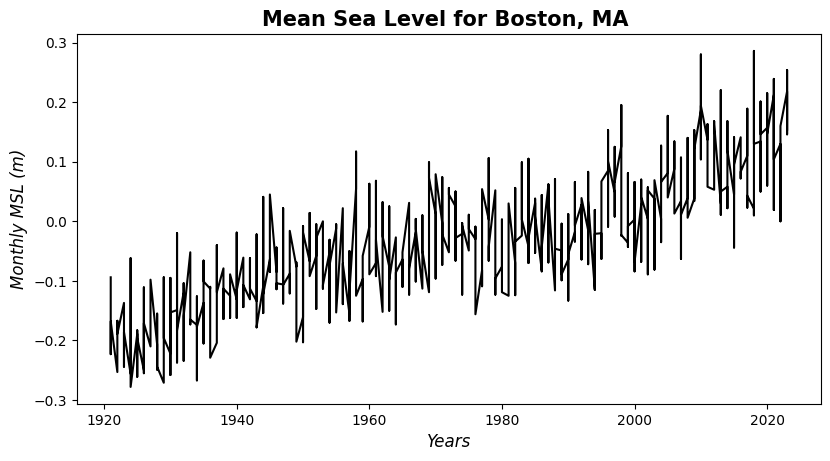

In [12]:
plot_sl('Boston_MA_2023.csv'); #the ; suppresses the function output, if we deleted this we would see the dataframe

It works! We now have a convienent function to use to visualize and process sea level data for any NOAA Tide Gauge station. Functions are a wonderful part of any coding language, especially Python (can you tell that I am a huge fan??).

This concludes the in-person section of the excerise. Below is an optional addition to the exercise that fits and plots a linear model to our sea level data using the `sklearn` machine learning library. If you are interested in data analysis, I highly recommend you work through the next section on your own time (if we don't get to it in class).

## Exercise #2 Optional Skills Practice

### 4. Fit a regression model

In order to estimate rates of sea level change, NOAA fits a simple linear regression model to the monthly mean sea level (MSL) data. We'll be replicating this approach and fitting our own linear model with our newly cleaned data, using the machine learning library `sklearn`.

If you haven't learned about regressions or don't remember them from previous course work, do not fret! Brynn will be reviewing these statistical tools in her class, **Probability & Statistics**, later in the summer. I highly encourage checking those out if you will be working with a lot of data for your research!

In [13]:
# first, assign our input and output variables to construct the model

# we have to convert these columns of datas into 1D arrays to use with the sklearn functions. we assign the variables using np.array(), and change the dimensions of the array with .reshape()
# the -1 in reshape means numpy has to figure out that dimension (i.e., in this case, an unknown number of rows)
yrs = np.array(wh_sl.loc[:,'Year']).reshape(-1,1) #loc isolates rows and/or columns based on labels
msl = np.array(wh_sl.iloc[:,2]).reshape(-1,1) #iloc isolates rows and/or based on index
#remember python indexing starts at 0!

# make sure we got the right data!
print(yrs)
print() # just an empty space to separate our two arrays
print(msl)

[[1932]
 [1932]
 [1932]
 ...
 [2023]
 [2023]
 [2023]]

[[-0.18 ]
 [-0.143]
 [-0.22 ]
 ...
 [ 0.167]
 [ 0.27 ]
 [ 0.193]]


These arrays should match their respective columns in the dataframe above. Now we can bring in our linear model setup from sklearn.

In [14]:
# initialize and fit the linear regression model
lm = LinearRegression().fit(yrs,msl)
lm.score(yrs,msl) # this extracts our R^2 value

0.7504482798390497

In [15]:
# use fitted linear model to model predicted MSL values
modeled_msl = lm.predict(yrs)

In [16]:
# extract the model coefficient and intercept
# the .item() takes the value from an array datatype to a float
slope = lm.coef_.item()
intcpt = lm.intercept_.item()

print('The rate of sea level change for Woods Hole, MA is: ', round(slope,3),' meters per year.')

The rate of sea level change for Woods Hole, MA is:  0.003  meters per year.


Neat! We just extracted a rate of sea level rise in meters per year for Woods Hole. We can now overlay the calculated regression line to our raw MSL data we plotted before to examine the fit.

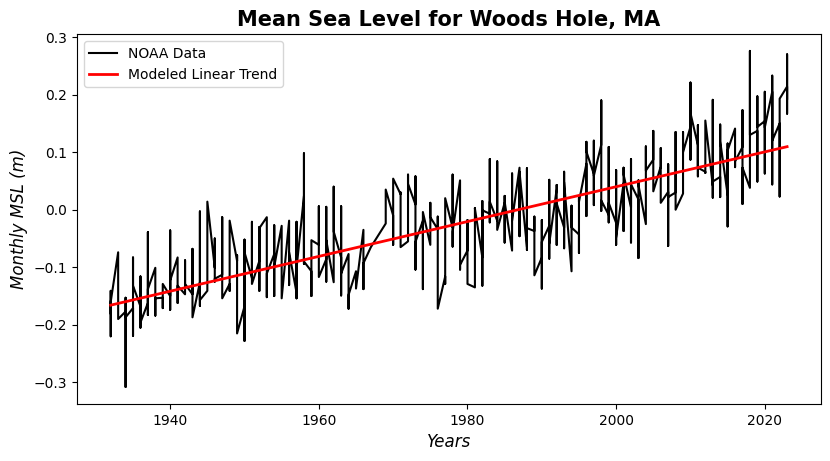

Model score (R²):  0.75
The rate of sea level change for Woods Hole, MA is:  0.003  meters per year.


In [17]:
fig = plt.figure(figsize=plt.figaspect(0.5))
plt.plot(years,msl, color='k');
plt.xlabel('Years',style='italic',fontsize=12);
plt.ylabel('Monthly MSL (m)',style='italic',fontsize=12);
plt.title('Mean Sea Level for Woods Hole, MA', weight='bold',fontsize=15);

# add regression line
plt.plot(yrs, modeled_msl, color='r', linewidth=2.0)
plt.legend(['NOAA Data','Modeled Linear Trend'])
plt.show()

# print out model specifications
print('Model score (R\u00b2): ', round(float(lm.score(yrs,msl)),2))
print('The rate of sea level change for Woods Hole, MA is: ', round(slope,3), ' meters per year.')

Congratulations! We just fitted a linear sea level rise model for Woods Hole. This concludes the data science section of the class. 